# Estudo de caso by: Tertius Ferraz

## [XV3E48] Pessoa Cientista de Dados I

### Projeto 2: Desenvolver um modelo de recuperação de dívidas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Análise exploratória de dados

1. **Carregar o dataset**
2. **Entendendo a estrutura dos dados**
3. **Resumo das estatísticas**
4. **Análise de valores nulos**
5. **Tipos de dados**
6. **Visualização da distribuição das features**

### Step 1: **Carregar o dataset**

In [2]:
file_path = "C:\\Users\\terti\\jupyter_lab\\RecrutAI\\base_case.csv"
df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

### Step 2: **Entendendo a estrutura dos dados**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 203 entries, index to REGIAO
dtypes: float64(52), int64(103), object(48)
memory usage: 72.1+ MB


In [4]:
df.head(5)

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,...,0,2,NaN,MEDIO,NaN,3.0,-1.0,1.0,URBANO,NORTE
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,...,0,4,D,MEDIO,D,2.0,1.0,1.0,URBANO,NORDESTE
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,...,0,8,B,MUITO ALTO,B+,4.0,3.0,1.0,URBANO,SUDESTE
3,3,1,2023-02-28,CREDITO PESSOAL,48,1090.58,30 a 60,0,0,0,...,0,1,C,BAIXO,C-,4.0,-4.0,0.0,URBANO,SUDESTE
4,4,0,2023-02-28,CREDITO PESSOAL,34,1495.49,30 a 60,0,0,0,...,0,3,C,MEDIO,C,4.0,-1.0,1.0,URBANO,SUDESTE


### Step 3: **Resumo das estatísticas**

In [5]:
df.describe()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,...,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199
count,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.0,46522.000000,46522.000000,46522.000000,...,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,42393.000000,42374.000000,43038.000000
mean,23260.500000,0.128541,45.232664,5705.319267,0.272538,0.003074,0.0,0.000150,0.017991,0.142427,...,0.407506,0.088582,0.038240,0.192576,0.000172,0.002601,2.430356,2.943552,-0.799948,0.688183
std,13429.888948,0.334695,8.358060,14505.087222,0.621192,0.056129,0.0,0.012266,0.132922,0.600622,...,0.491376,0.284142,0.191777,0.394327,0.013112,0.050933,2.109616,1.122959,1.885828,0.463241
min,0.000000,0.000000,31.000000,0.760000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,11630.250000,0.000000,38.000000,812.957500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-2.000000,0.000000
50%,23260.500000,0.000000,46.000000,1823.965000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,-1.000000,1.000000
75%,34890.750000,0.000000,52.000000,4279.897500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,1.000000
max,46521.000000,1.000000,60.000000,294608.140000,8.000000,2.000000,0.0,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,11.000000,7.000000,1.000000


### Step 4: Análise dos valores nulos

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

col_51     4753
col_52     4753
col_53     4753
col_54     4753
col_55     4753
           ... 
col_197    4129
col_198    4148
col_199    3484
col_200    4859
REGIAO     4653
Length: 80, dtype: int64

### Step 5: Tipos de dados

In [7]:
data_types = df.dtypes
unique_values = df.nunique()
data_overview = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})
data_overview


,Data Type,Unique Values
index,int64,46522
alvo,int64,2
REF_DATE,object,13
PRODUTO,object,1
DIAS_ATRASO,int64,30
...,...,...
col_197,float64,12
col_198,float64,18
col_199,float64,2
col_200,object,3


### Step 5: **Visualização da distribuição das features**

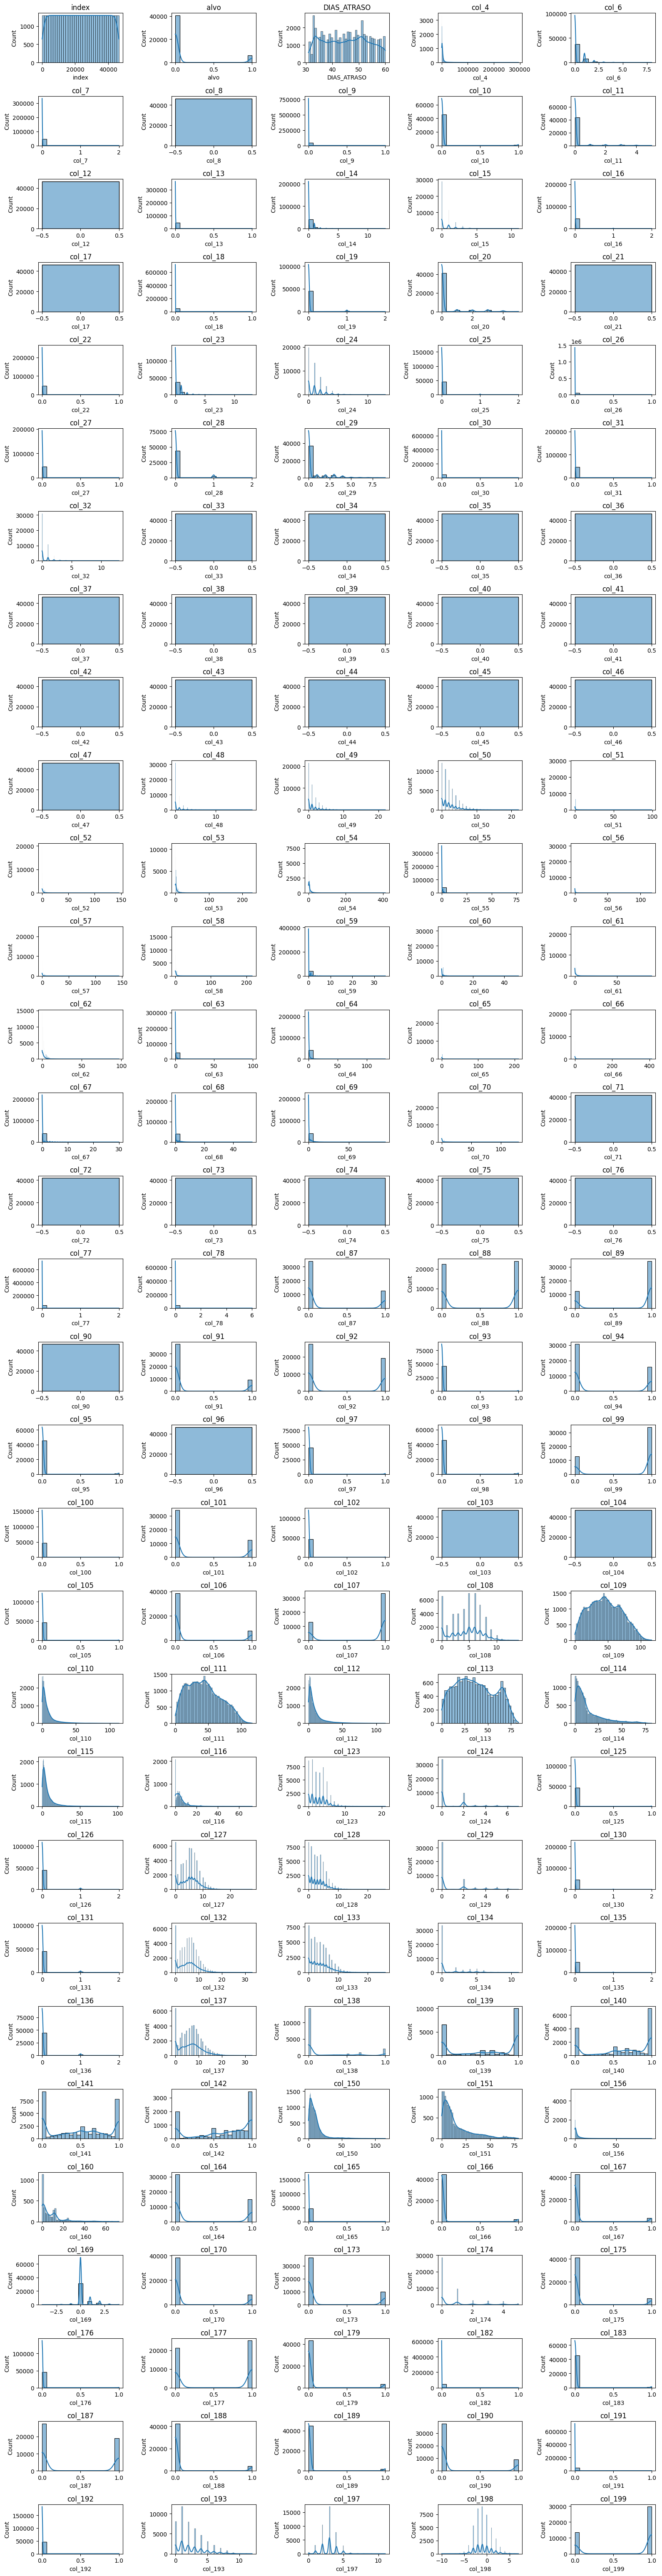

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 5
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 10 * n_rows // n_cols))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Como podemos ver nos gráficos plotados acima, temos diversas features que possuem apenas um valor. ou seja, features com baixa variancia. Mais a frente faremos um Varience threshold que irá remover essas features do nosso modelo. 

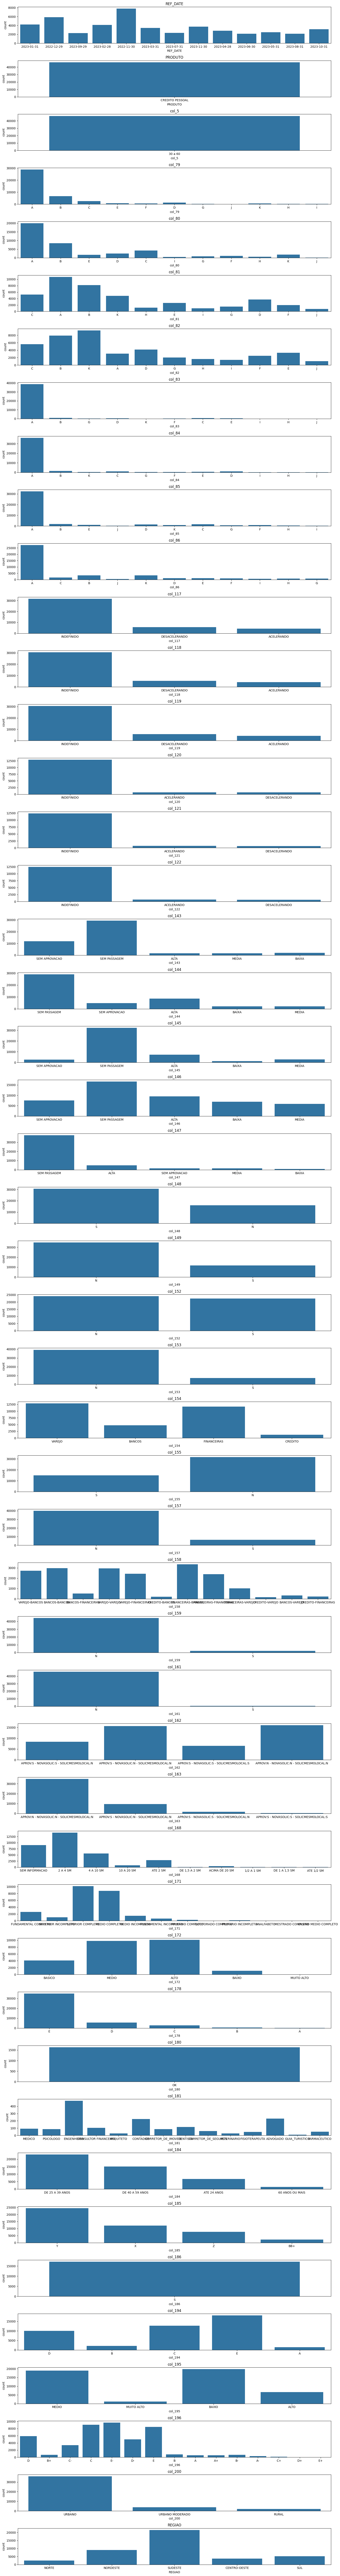

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 120))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Pré-processamento dos dados
 
- **Remover features com baixa variância**
- **Remover features com taxa de valores nulos maiores do que 10%**
- **Divisão dos dados em treino e teste**

Devemos retirar do nosso modelo as features categóricas extremamente desbalanceadas para não enviesar nosso modelo. Essas features de dados categóricos com baixas variâncias iremos remover manualmente

São elas: REF_DATE  PRODUTO  5  83  84  85  86  117  118  119  120  121  122  147  159  161  178  180  186  200

In [10]:
df.drop(['REF_DATE', 'PRODUTO', 'col_5', 'col_83', 'col_84', 'col_85', 'col_86', 'col_117', 'col_118', 'col_119',
         'col_120', 'col_121', 'col_122', 'col_147', 'col_159', 'col_161', 'col_178', 'col_180', 'col_186', 'col_200'], axis=1, inplace=True)

In [11]:
# Calcula a porcentagem de valores nulos em cada coluna
null_percentages = df.isnull().mean() * 100

# Identifica as colunas com mais de 10% de valores nulos
columns_to_drop = null_percentages[null_percentages > 10].index
df.drop(columns=columns_to_drop)

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,...,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0,0,0,52,2461.11,0,0,0,0,0,0,...,0,0,0,2,NaN,MEDIO,NaN,3.0,-1.0,1.0
1,1,0,37,4674.50,0,0,0,0,0,0,...,0,0,0,4,D,MEDIO,D,2.0,1.0,1.0
2,2,0,36,43649.17,1,0,0,0,0,0,...,1,0,0,8,B,MUITO ALTO,B+,4.0,3.0,1.0
3,3,1,48,1090.58,0,0,0,0,0,0,...,1,0,0,1,C,BAIXO,C-,4.0,-4.0,0.0
4,4,0,34,1495.49,0,0,0,0,0,0,...,0,0,0,3,C,MEDIO,C,4.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,46517,1,45,1404.07,0,0,0,0,0,0,...,0,0,0,0,E,BAIXO,E-,3.0,-3.0,0.0
46518,46518,0,46,449.19,0,0,0,0,0,0,...,0,0,0,1,D,BAIXO,D,1.0,0.0,0.0
46519,46519,1,54,1965.92,2,0,0,0,0,0,...,0,0,0,3,D,MEDIO,D,3.0,-1.0,0.0
46520,46520,1,39,858.38,2,0,0,0,0,0,...,0,0,0,3,D,MEDIO,D,3.0,-1.0,0.0


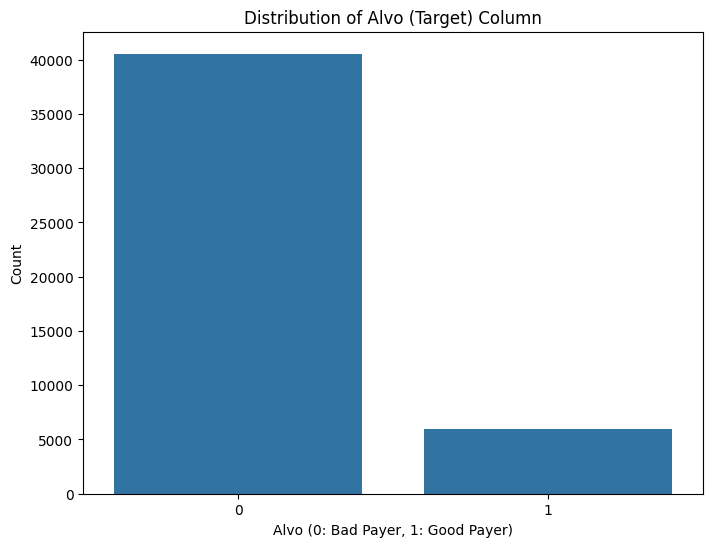

In [12]:
# Plotando a distribuição da coluna alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='alvo', data=df)
plt.title('Distribution of Alvo (Target) Column')
plt.xlabel('Alvo (0: Bad Payer, 1: Good Payer)')
plt.ylabel('Count')
plt.show()

Podemos notar um desbalanceamento muito grande da nossa classe alvo. Primeiro iremos treinar um modelo sem realizar um undersampling, mas possivelmente será necessário balancear as classes para melhor resultado das métricas

In [13]:
from sklearn.feature_selection import VarianceThreshold

# Filtrar apenas as colunas do tipo float64 e int64
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Subset dos dados com as colunas numéricas selecionadas
numeric_data = df[numeric_columns]

# Aplicar o VarianceThreshold apenas nas colunas numéricas
threshold = 0.1
selector = VarianceThreshold(threshold)
selector.fit(numeric_data)
high_variance_indices = selector.get_support(indices=True)
selected_numeric_data = numeric_data.iloc[:, high_variance_indices]

# Juntar as colunas numéricas selecionadas com as colunas categóricas
df = pd.concat([selected_numeric_data, df.select_dtypes(exclude=['float64', 'int64'])], axis=1)

In [14]:
df.head()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_11,col_14,col_15,col_20,col_23,...,col_168,col_171,col_172,col_181,col_184,col_185,col_194,col_195,col_196,REGIAO
0,0,0,52,2461.11,0,0,0,0,0,0,...,SEM INFORMACAO,FUNDAMENTAL COMPLETO,BASICO,NaN,DE 25 A 39 ANOS,Y,NaN,MEDIO,NaN,NORTE
1,1,0,37,4674.50,0,0,0,0,0,0,...,2 A 4 SM,SUPERIOR INCOMPLETO,MEDIO,NaN,DE 25 A 39 ANOS,Y,D,MEDIO,D,NORDESTE
2,2,0,36,43649.17,1,0,0,1,0,0,...,4 A 10 SM,SUPERIOR COMPLETO,ALTO,NaN,DE 40 A 59 ANOS,X,B,MUITO ALTO,B+,SUDESTE
3,3,1,48,1090.58,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,DE 40 A 59 ANOS,X,C,BAIXO,C-,SUDESTE
4,4,0,34,1495.49,0,0,0,0,0,0,...,2 A 4 SM,NaN,NaN,NaN,DE 25 A 39 ANOS,Y,C,MEDIO,C,SUDESTE


### **Como podemos perceber, após o tratamento de features com alta taxa de valores nulos e baixas variâncias, das 223 features iniciais, temos agora apenas 114. Foram dados que serão excluído do nosso modelo pois poderiam enviesar o treinamento**

Primeiro vamos dividir nossos dados em treino e teste, para apenas após realizar o SimpleImputer e label encoders. dessa forma não haverá data leakage dos nossos dados de treinamento no conjunto de teste

Vamos falar um pouco sobre as métricas de avaliação que iremos utilizar:

Acurácia (Accuracy): A acurácia mede a proporção de previsões corretas feitas pelo modelo. Ela é calculada como a razão entre o número total de previsões corretas e o número total de exemplos. No entanto, a acurácia pode ser enganosa quando temos classes desbalanceadas ou quando os erros de falsos positivos e falsos negativos têm diferentes impactos.

Revocação (Recall): A revocação (ou sensibilidade) mede a proporção de exemplos positivos corretamente identificados pelo modelo em relação ao total de exemplos positivos

F1-Score: O F1-Score é uma métrica que combina tanto a precisão quanto a revocação, equilibrando o trade-off entre as duas. É a média harmônica da precisão e da revocação:

### Random forest sem balanceamento dos dados

In [15]:
# Definindo features e target
X = df.drop(columns=['alvo'])
y = df['alvo']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicando SimpleImputer nos dados de treinamento e teste
imputer = SimpleImputer(strategy='mean')
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = imputer.transform(X_val[numeric_columns])

label_encoders = {}
# Aplicando LabelEncoder às colunas categóricas
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column].astype(str))
    X_val[column] = label_encoders[column].transform(X_val[column].astype(str))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Trainado Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
y_pred = model.predict(X_val)

In [17]:
# Calculando as métricas
accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

(accuracy, recall, f1)

(0.8757657173562601, 0.0680327868852459, 0.12556732223903178)

Como já era esperado, por haver um desbalanceamento muito grande das nossas classes, obtemos um recall de apenas 6.8%. Para resolver este problema podemos usar da técnica de undersample, reduzindo a quantidade da classe majoritária (classe 0: mau pagador)

Bom pagador classificado como bom (6,9%)
Mau pagador classificado como bom (0,2%)

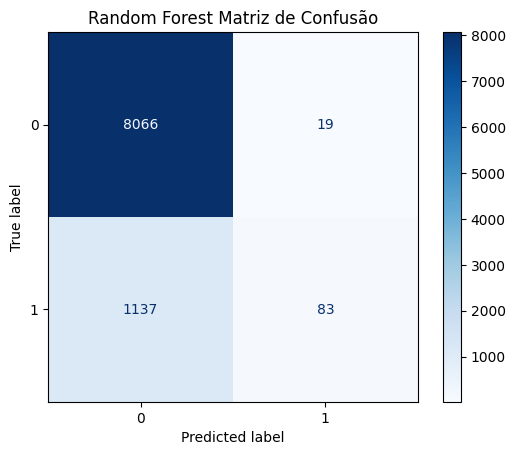

In [18]:
cm = confusion_matrix(y_val, y_pred)

# plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Matriz de Confusão')
plt.show()

Como podemos ver na matriz de confusão, temos pouquissimas previsões de que se alguém é bom pagador, ele de fato é bom pagador. Então para o negócio esse modelo não é um bom modelo, pois queremos dar crédito as pessoas

### **Vamos realizar um undersampler para balancear as classes e obter um melhor recall, assim idenficiando melhor quem é bom pagador**

### Random Forest com balanceamento dos dados

In [19]:
# Definindo nosso undersampler
rus = RandomUnderSampler(random_state=42)

# Aplicando o undersampler aos nossos dados
X_res, y_res = rus.fit_resample(X, y)

# Fazendo a divisão dos dados em treino e teste
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Aplicando o simpleimputer nos dados de treino e teste
imputer = SimpleImputer(strategy='mean')
X_train_res[numeric_columns] = imputer.fit_transform(X_train_res[numeric_columns])
X_val_res[numeric_columns] = imputer.transform(X_val_res[numeric_columns])

# Aplicando LabelEncoder às colunas categóricas
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X_train_res[column] = label_encoders[column].fit_transform(X_train_res[column].astype(str))
    X_val_res[column] = label_encoders[column].transform(X_val_res[column].astype(str))

# Treinando o randomforest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# fazendo predição no conjunto de teste
y_pred_res = model.predict(X_val_res)

# calculando as métricas
accuracy_res = accuracy_score(y_val_res, y_pred_res)
recall_res = recall_score(y_val_res, y_pred_res)
f1_res = f1_score(y_val_res, y_pred_res)

print(f"Accuracy: {accuracy_res}")
print(f"Recall: {recall_res}")
print(f"F1 Score: {f1_res}")

Accuracy: 0.56438127090301
Recall: 0.5562180579216355
F1 Score: 0.5562180579216355


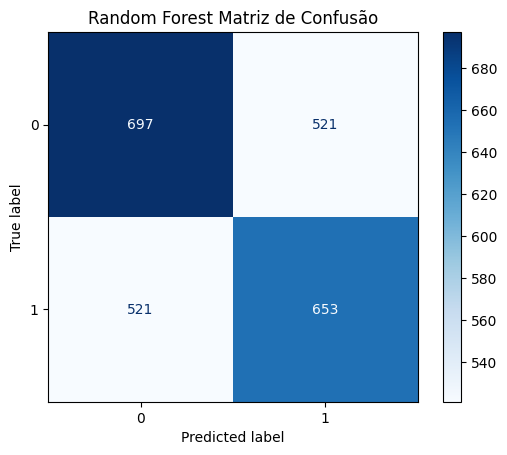

In [20]:
cm = confusion_matrix(y_val_res, y_pred_res)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Matriz de Confusão')
plt.show()

Agora ja percebemos um balanceamento bem melhor. Onde conseguimos uma taxa de 55,6% de identificação de quem é verdadeiramente um bom pagador. Ainda temos um problema que estamos idenficando muitas pessoas, neste caso 42,7% de pessoas que são mau pagadoras como boas. Isto pode ser ruim para o Negócio da empresa pois não queremos dar crédito a pessoas que são mau pagadoras. Precisamos melhorar mais nosso modelo

Bom pagador classificado como bom (55,6%) 

Mau pagador classificado como bom (42,7%)

### Vamos fazer um gridsearch com Random Forest nos nossos dados balanceados

In [21]:
# Definindo os parâmetros do gridsearchcv
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializando nosso randomforest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

grid_search.fit(X_train_res, y_train_res)

# Obtendo os melhores parâmetros e o melhor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fazendo predições no melhor modelo
y_pred_best = best_model.predict(X_val_res)

# Calculando as métricas
accuracy_best = accuracy_score(y_val_res, y_pred_best)
recall_best = recall_score(y_val_res, y_pred_best)
f1_best = f1_score(y_val_res, y_pred_best)

(accuracy_best, recall_best, f1_best)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


(0.5794314381270903, 0.58603066439523, 0.5776658270361041)

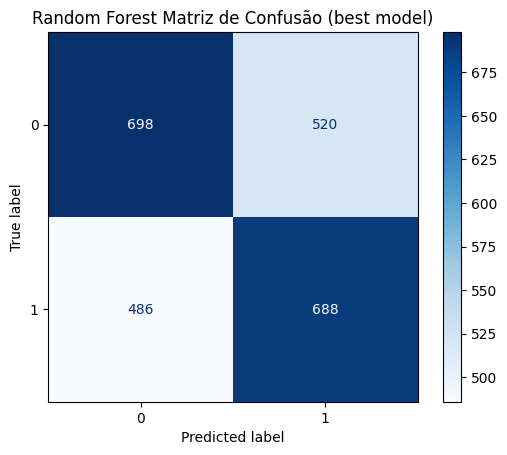

In [22]:
cm = confusion_matrix(y_val_res, y_pred_best)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Matriz de Confusão (best model)')
plt.show()

Bom pagador classificado como bom (58,6%)

Mau pagador classificado como bom (42,7%)

### Aqui vamos utilizar uma técnica para idenfiticar nossas melhores features, e assim treinar o nosso modelo nas 30 melhores features

In [23]:
# Capturando a importância das features do nosso melhor modelo
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# printando o ranking das melhores features
print("Feature ranking:")
for f in range(X_train_res.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Selecionando as melhores 30 features
top_n_features = 30
X_train_top = X_train_res.iloc[:, indices[:top_n_features]]
X_val_top = X_val_res.iloc[:, indices[:top_n_features]]

# Retrain the model with top features
best_model.fit(X_train_top, y_train_res)
y_pred_top = best_model.predict(X_val_top)

# Calculando as métricas
accuracy_top = accuracy_score(y_val_res, y_pred_top)
recall_top = recall_score(y_val_res, y_pred_top)
f1_top = f1_score(y_val_res, y_pred_top)

(accuracy_top, recall_top, f1_top)

Feature ranking:
1. feature 2 (0.04599479860549742)
2. feature 0 (0.042070363960900824)
3. feature 1 (0.0371060072565338)
4. feature 46 (0.0365530631696403)
5. feature 48 (0.03481298504941792)
6. feature 47 (0.03297491370852751)
7. feature 49 (0.03145910327563974)
8. feature 52 (0.02989914432887399)
9. feature 68 (0.02586727373500529)
10. feature 70 (0.017499688982715807)
11. feature 83 (0.017070762724862118)
12. feature 111 (0.015796768498072728)
13. feature 66 (0.01577096287805082)
14. feature 18 (0.014946575988017161)
15. feature 82 (0.014802918260737962)
16. feature 112 (0.01433411386935562)
17. feature 62 (0.01419207257827618)
18. feature 81 (0.013800500605940553)
19. feature 50 (0.01362284630220726)
20. feature 59 (0.013334110901650122)
21. feature 103 (0.01279447597031717)
22. feature 56 (0.012718890958756819)
23. feature 26 (0.012231383469101288)
24. feature 51 (0.011946271121954975)
25. feature 45 (0.011332784089929673)
26. feature 22 (0.01121891175913094)
27. feature 88 (0.01

(0.5731605351170569, 0.5928449744463373, 0.5768752590136759)

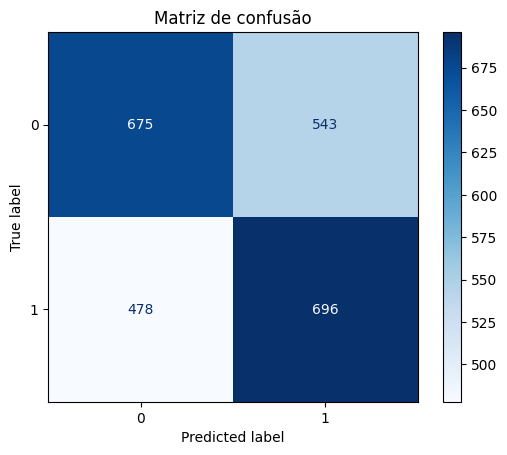

In [24]:
cm = confusion_matrix(y_val_res, y_pred_top)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão')
plt.show()

Estamos obtendo pequenas melhoras no random forest, mas ainda não está bom o suficiente.

Bom pagador classificado como bom (59,3%)

Mau pagador classificado como bom (44,6%)

### Treinando um modelo de xgboost e colocando peso nas classes

In [25]:
# Treinando o xgboost
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1]), random_state=42)

# Treinando o nosso modelo
xgb_model.fit(X_train_res, y_train_res)

# fazendo predições
y_pred_xgb = xgb_model.predict(X_val_res)

# Calculando as métricas
accuracy_xgb = accuracy_score(y_val_res, y_pred_xgb)
recall_xgb = recall_score(y_val_res, y_pred_xgb)
f1_xgb = f1_score(y_val_res, y_pred_xgb)

(accuracy_xgb, recall_xgb, f1_xgb)

(0.5572742474916388, 0.561328790459966, 0.5544804375262936)

Bom pagador classificado como bom (56,1%)

Mau pagador classificado como bom (44,7%)

O Random Forest com as melhores features ainda apresenta melhor desempenho

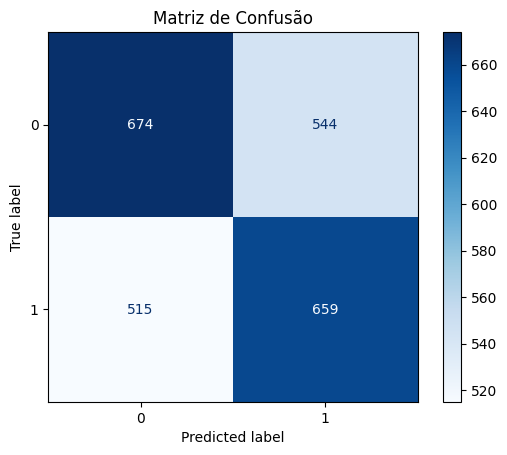

In [26]:
cm = confusion_matrix(y_val_res, y_pred_xgb)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

### MLP (Vamos treinar um classificador baseado em redes neurais).

In [27]:
# Definindo um classificador MLP com nossos dados que sofreram undersample
mlp = MLPClassifier(hidden_layer_sizes=(700, 300), max_iter=300, random_state=42)

# treinando o modelo
mlp.fit(X_train_res, y_train_res)

# Fazendo predições no conjunto de teste
y_pred_mlp = mlp.predict(X_val_res)

# Calculate metrics
accuracy_mlp = accuracy_score(y_val_res, y_pred_mlp)
recall_mlp = recall_score(y_val_res, y_pred_mlp)
f1_mlp = f1_score(y_val_res, y_pred_mlp)

print(f"Accuracy: {accuracy_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")

Accuracy: 0.4954013377926421
Recall: 0.8764906303236797
F1 Score: 0.6303215926493109


**Neste caso obtemos um recall muito bom, conseguindo idenficar bem que são bons pagadores verdadeiros, mas infelizmente a acurácia está baixa, fazendo com que também identifiquemos mau pagadores como bons**

Bom pagador classificado como bom (87,6%)

Mau pagador classificado como bom (87,2%)

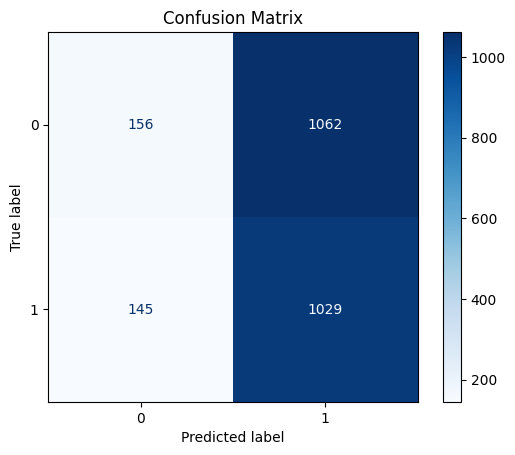

In [28]:
cm = confusion_matrix(y_val_res, y_pred_mlp)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Abaixo Testei alguns valores de threshold, tanto baixos (0.2, 0.3, 0.4) quanto altos (0.6, 0.7, 0.8) Mas continua uma disparidade grande entre o recall e accuracy

In [29]:
# Definindo um classificador MLP com nossos dados que sofreram undersample
mlp = MLPClassifier(hidden_layer_sizes=(700, 300), max_iter=300, random_state=42)

# treinando o modelo
mlp.fit(X_train_res, y_train_res)

predicted_proba = mlp.predict_proba(X_val_res)

# Escolha o threshold (por exemplo, 0,4)
threshold = 0.8

# Atribua as classes com base no threshold
predicted = (predicted_proba[:, 1] >= threshold).astype('int')

# Calcule a acurácia
accuracy_mlp = accuracy_score(y_val_res, predicted)
recall_mlp = recall_score(y_val_res, predicted)
f1_mlp = f1_score(y_val_res, predicted)

print(f"Accuracy: {accuracy_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")

Accuracy: 0.5012541806020067
Recall: 0.7793867120954003
F1 Score: 0.6053589149851141


**Obtemos uma melhora não significativa na accuracy em relação ao MLP anterior, mas o recall teve desempenho piorado**

bons pagadores identificados como bons (77,94%)

maus pagadores identificados como bons (76,7%)

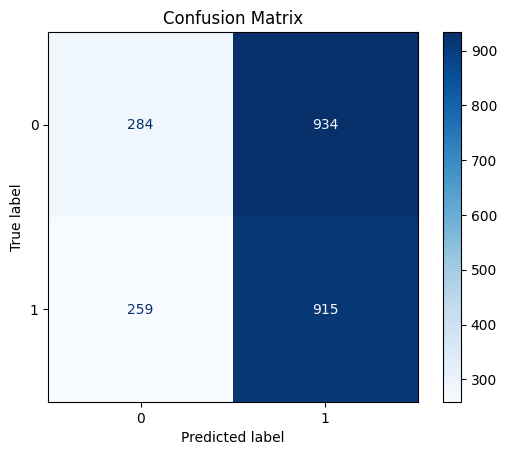

In [30]:
cm = confusion_matrix(y_val_res, predicted)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Vamos treinar uma regressão logistica e analisar o desempenho

In [31]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42, max_iter = 2000)

# Treine o modelo
LR.fit(X_train_res, y_train_res)

# Fazendo predições no conjunto de teste
y_pred = LR.predict(X_val_res)

# Calcule as métricas de avaliação
accuracy_logistic = accuracy_score(y_val_res, y_pred)
recall_logistic = recall_score(y_val_res, y_pred)
f1_logistic = f1_score(y_val_res, y_pred)

print(f"Accuracy (Regressão Logística): {accuracy_logistic:.2f}")
print(f"Recall (Regressão Logística): {recall_logistic:.2f}")
print(f"F1 Score (Regressão Logística): {f1_logistic:.2f}")

Accuracy (Regressão Logística): 0.52
Recall (Regressão Logística): 0.53
F1 Score (Regressão Logística): 0.52


D:\programs\Anaconda3\envs\Projeto-Chico\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Nada melhor do que obtivemos até agora**

# Classificador de voto majoritário
**selecionando os 4 melhores modelos treinados até agora**

In [32]:
from sklearn.ensemble import VotingClassifier
classifiers = [
    ('rf', best_model),
    ('xgb', xgb_model),
    ('mlp',  mlp),
    ('lr',  LR),
]

voting_clf = VotingClassifier(estimators=classifiers, voting='hard')
voting_clf.fit(X_train_res, y_train_res)

# Fazendo predições no conjunto de teste
y_pred = voting_clf.predict(X_val_res)

# Calculate metrics
accuracy = accuracy_score(y_val_res, y_pred)
recall = recall_score(y_val_res, y_pred)
f1 = f1_score(y_val_res, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.56061872909699
Recall: 0.5391822827938672
F1 Score: 0.5463962019853259


D:\programs\Anaconda3\envs\Projeto-Chico\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


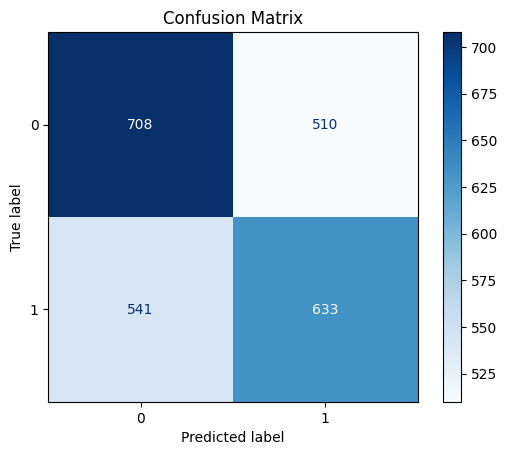

In [33]:
cm = confusion_matrix(y_val_res, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Bom pagador classificado como bom (53,9%)

Mau pagador classificado como bom (41,9%)

# Classificador de voto majoritário

Agora treinaremos um classificador de voto majoritário, mas sem utilizar a regressão logística

In [34]:
from sklearn.ensemble import VotingClassifier
classifiers = [
    ('rf', best_model),
    ('xgb', xgb_model),
    ('mlp',  mlp),
]

voting_clf = VotingClassifier(estimators=classifiers, voting='hard')
voting_clf.fit(X_train_res, y_train_res)

# Fazendo predições no conjunto de teste
y_pred = voting_clf.predict(X_val_res)

# Calculate metrics
accuracy = accuracy_score(y_val_res, y_pred)
recall = recall_score(y_val_res, y_pred)
f1 = f1_score(y_val_res, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5698160535117057
Recall: 0.6873935264054515
F1 Score: 0.6106696935300795


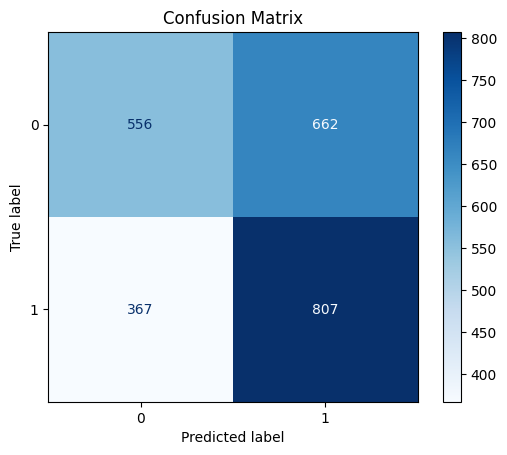

In [35]:
cm = confusion_matrix(y_val_res, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Bom pagador classificado como bom (68,7%)

Mau pagador classificado como bom (54,4%)

# StackingClassifier
**Por último vamos tentar um stackingclassifier nos nossos melhores modelos. Ele vai combinar as melhores partes de cada modelo**

In [36]:
from sklearn.ensemble import StackingClassifier

estimators_base = [
    ('rf', best_model),
    ('xgb', xgb_model),
    ('mlp',  mlp),
    ('lr',  LR),
]

# Definindo o estimador final (meta-classificador)
estimador_final = LogisticRegression(max_iter=2000)

# Criando o objeto StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators_base, final_estimator=estimador_final, cv=5)

# Treinando o StackingClassifier
stacking_clf.fit(X_train_res, y_train_res)

# Fazendo predições no conjunto de teste
y_pred = stacking_clf.predict(X_val_res)

# Calculate metrics
accuracy = accuracy_score(y_val_res, y_pred)
recall = recall_score(y_val_res, y_pred)
f1 = f1_score(y_val_res, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

D:\programs\Anaconda3\envs\Projeto-Chico\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\programs\Anaconda3\envs\Projeto-Chico\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy: 0.5811036789297659
Recall: 0.5587734241908007
F1 Score: 0.5669835782195333


D:\programs\Anaconda3\envs\Projeto-Chico\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


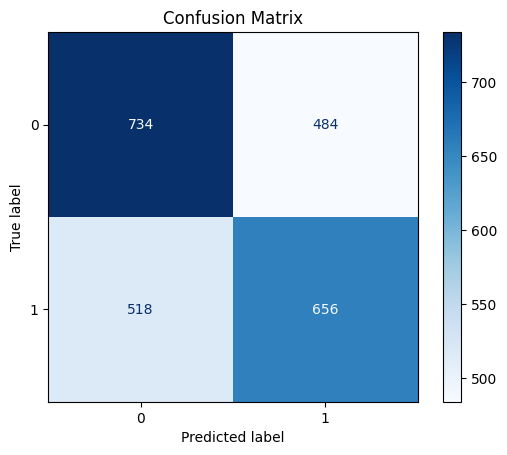

In [37]:
cm = confusion_matrix(y_val_res, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Bom pagador classificado como bom (55,9%)

Mau pagador classificado como bom (39,7%)

# Conclusões

### Análise técnica do modelo: Após realizar um pré-processamento de dados para lidar com dados nulos e features desbalanceadas, treinar diversos modelos de aprendizagem de máquina, notamos que nosso melhor modelo é o StackingClassifier. Acredito que a performance poderia ser melhorada significativamente com uma melhor qualidade dos dados, ou uma quantidade maior de dados sobre a classe alvo 1: Bom pagador, pois ao fazer os tratamentos necessários, há uma redução grande na quantidade de dados. O Stacking combina diversos modelos de treinamento, aproveitando o melhor de cada modelo, reduzindo também o risco de overfitting. 

### Análise de negócio: Esses modelos tem um impacto muito grande no negócio. Podendo reduzir o risco de oferecer crédito a mau pagadores, e também aumentando a oferta de crédito a pessoas com bom histórico de pagamento. Conseguir identificar quem são essas pessoas é essencial para estar bem posicionado no mercado e poder aumentar a receita. Ao saber quem são os bons pagadores, podemos ofertar melhores condições para o pagamento de suas dívidas, assim diminuindo possíveis perdas e recuperando o dinheiro de empréstimos condecidos. O cliente bom pagador também percebe o impacto positivo, se sentirá recompensado, sabendo que é um bom pagador e terá sua oportunidade de pagar suas dívidas com ofertas especiais, podendo até pedir novas linhas de crédito no futuro.